# [Integrating data using ingest](https://scanpy-tutorials.readthedocs.io/en/latest/integrating-data-using-ingest.html)

## Open the datasets

In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np

In [2]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

scanpy


In [3]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, dpi_save=300,frameon=False, figsize=(3, 3), facecolor='white', vector_friendly=True, transparent=True)

scanpy==1.7.0rc1 anndata==0.7.5 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

I'll follow the tutorial

In [5]:
cd /Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep

/Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep


In [6]:
adata = sc.read('./220310_concat_dataset.h5ad', cache=True)

In [7]:
adata

AnnData object with n_obs × n_vars = 10653 × 2629
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'clusters'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-075', 'mean_counts-075', 'pct_dropout_by_counts-075', 'total_counts-075', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-FGFRi', 'mean_counts-FGFRi', 'pct_dropout_by_counts-FGFRi', 'total_counts-FGFRi', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'clusters_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

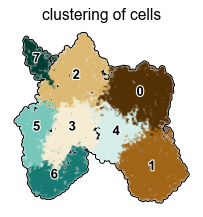

In [8]:
sc.tl.leiden(adata, key_added='clusters', resolution=0.33)
sc.pl.umap(adata, color=['clusters'], add_outline=True, legend_loc='on data', palette = 'BrBG',legend_fontsize=12, legend_fontoutline=2,frameon=False,title='clustering of cells', size=40)

### Meissner

In [9]:
cd /Users/gattigli/Desktop/scRNAseq/Meissner

/Users/gattigli/Desktop/scRNAseq/Meissner


In [10]:
adata_ref = sc.read('./Grosswendt_WT.h5ad', cache=True)

## inspect the reference dataset

In [11]:
adata_ref

AnnData object with n_obs × n_vars = 88779 × 22618
    obs: 'nGene', 'nUMI', 'orig.ident', 'embryo', 'cluster', 'stage', 'BC', 'sex', 'nCount_RNA', 'nFeature_RNA'
    var: 'features'
    obsm: 'X_UMAP'

In [12]:
adata_ref.obs.stage.value_counts()

WT_75    27422
WT_80    23344
WT_85    22515
WT_70    13218
WT_65     2280
Name: stage, dtype: int64

In [13]:
cell_type = adata_ref.obs.cluster.value_counts()
cell_type

19    5096
8     4808
1     4296
24    3883
0     3860
10    3806
5     3635
37    3137
22    3041
2     2908
26    2858
12    2755
29    2650
11    2579
39    2576
6     2510
20    2386
3     2322
18    2255
9     2091
13    2077
35    1988
15    1907
30    1819
36    1607
31    1595
34    1557
40    1434
7     1311
33    1297
32    1158
4     1081
25    1064
16     957
21     887
14     862
17     787
28     530
41     482
38     339
23     298
27     290
Name: cluster, dtype: int64

## Compare the datasets
 - normalize as the in vitro dataset
 - make both unique
 - intersect the datasets

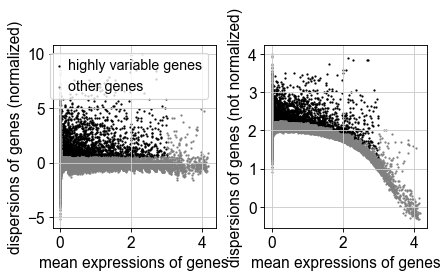

In [14]:
sc.pp.normalize_total(adata_ref, target_sum=5e4)
sc.pp.log1p(adata_ref)
sc.pp.highly_variable_genes(adata_ref, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_ref)
adata_ref = adata_ref[:, adata_ref.var.highly_variable]

In [15]:
adata_ref

View of AnnData object with n_obs × n_vars = 88779 × 2674
    obs: 'nGene', 'nUMI', 'orig.ident', 'embryo', 'cluster', 'stage', 'BC', 'sex', 'nCount_RNA', 'nFeature_RNA'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_UMAP'

In [16]:
sc.pp.scale(adata_ref, max_value=10)

/Users/gattigli/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:810: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
adata_ref.var_names = adata_ref.var_names.tolist()

In [18]:
adata.var_names_make_unique()
adata_ref.var_names_make_unique()

In [19]:
var_names = adata_ref.var_names.intersection(adata.var_names)

In [20]:
adata_ref = adata_ref[:, var_names].copy()
adata = adata[:, var_names].copy()

In [21]:
adata_ref.var_names

Index(['Sox17', 'Rdh10', 'Col9a1', 'Cfc1', 'Fhl2', 'Slc40a1', 'Mfsd6',
       '1700019D03Rik', 'Nrp2', 'Fn1',
       ...
       'Slc8a1', 'Prkg1', 'Acta2', 'Nppa', 'Cd36', 'Bmp3', 'Hoxa9', 'Hoxb5os',
       'Tg', 'Krt83'],
      dtype='object', length=1052)

In [22]:
adata.var_names

Index(['Sox17', 'Rdh10', 'Col9a1', 'Cfc1', 'Fhl2', 'Slc40a1', 'Mfsd6',
       '1700019D03Rik', 'Nrp2', 'Fn1',
       ...
       'Slc8a1', 'Prkg1', 'Acta2', 'Nppa', 'Cd36', 'Bmp3', 'Hoxa9', 'Hoxb5os',
       'Tg', 'Krt83'],
      dtype='object', length=1052)

## Ingest

Map labels and embeddings from adata_ref to adata based on a chosen representation. Here, I use adata_ref.obsm['X_pca'] to map cluster labels and the UMAP coordinates.

In [23]:
adata_ref

AnnData object with n_obs × n_vars = 88779 × 1052
    obs: 'nGene', 'nUMI', 'orig.ident', 'embryo', 'cluster', 'stage', 'BC', 'sex', 'nCount_RNA', 'nFeature_RNA'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'
    obsm: 'X_UMAP'

In [24]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)

In [25]:
sc.tl.umap(adata_ref)

... storing 'orig.ident' as categorical
... storing 'embryo' as categorical
... storing 'cluster' as categorical
... storing 'stage' as categorical
... storing 'BC' as categorical
... storing 'sex' as categorical


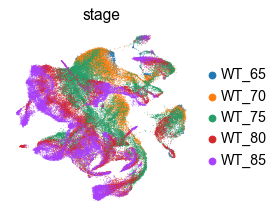

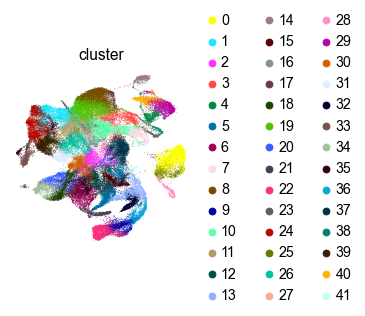

In [26]:
sc.pl.umap(adata_ref, color=['stage'], save = 'refdata_stage.pdf')
sc.pl.umap(adata_ref, color=['cluster'], save = 'refdata_cluster.pdf')

In [27]:
sc.tl.ingest(adata, adata_ref, obs=['cluster', 'stage'])

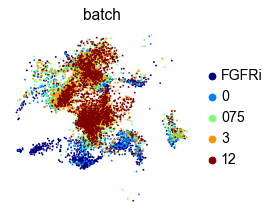

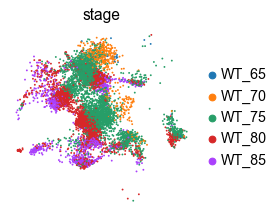

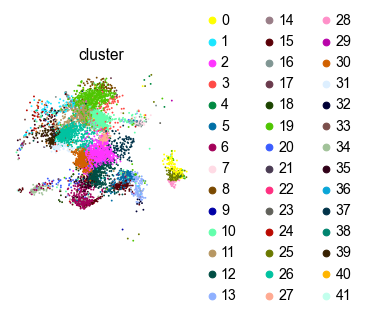

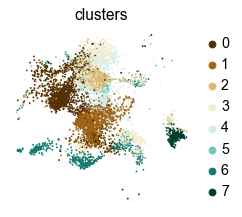

In [28]:
sc.pl.umap(adata, color=['batch'], save='meissner_batch.pdf')
sc.pl.umap(adata, color=['stage'], save='meissner_stage.pdf')
sc.pl.umap(adata, color=['cluster'], save='meissner_cluster.pdf')
sc.pl.umap(adata, color=['clusters'], wspace=0.5 , palette = 'BrBG',save='meissner_clusters_33.pdf')

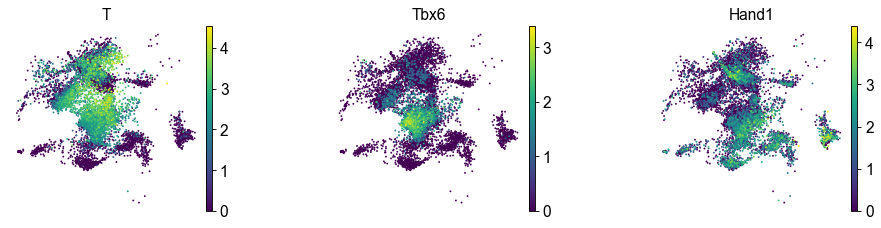

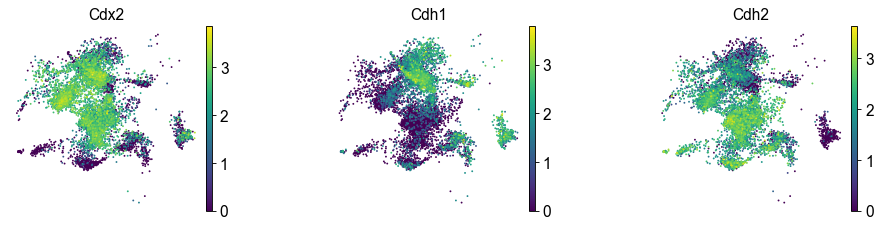

/Users/gattigli/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1182: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/Users/gattigli/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1183: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/Users/gattigli/opt/anaconda3/envs/scanpy/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:371: MatplotlibDeprecationWarn

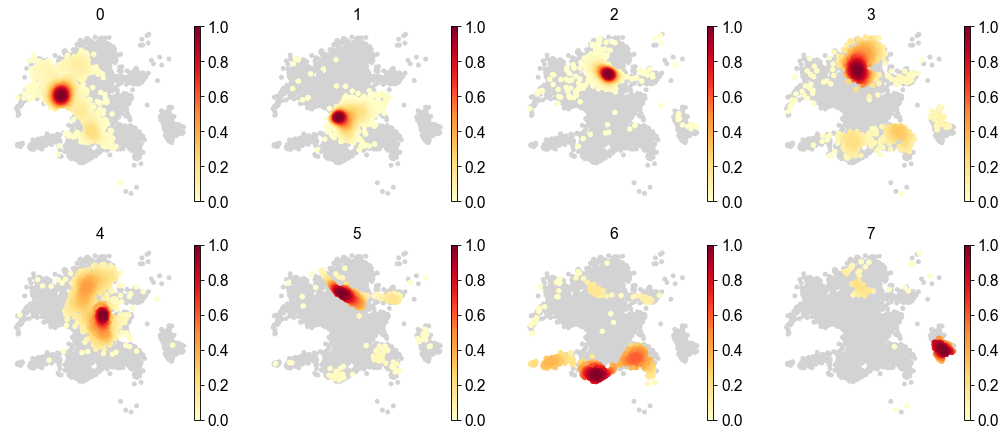

In [29]:
sc.pl.umap(adata, color=['T', 'Tbx6', 'Hand1'], wspace=0.5, save='meissner_markers.pdf')
sc.pl.umap(adata, color=['Cdx2', 'Cdh1', 'Cdh2'], wspace=0.5, save='meissner_markers2.pdf')
sc.tl.embedding_density(adata, groupby='clusters')
sc.pl.embedding_density(adata, groupby='clusters', fg_dotsize=100, save='meissner_density_clusters_33.pdf')

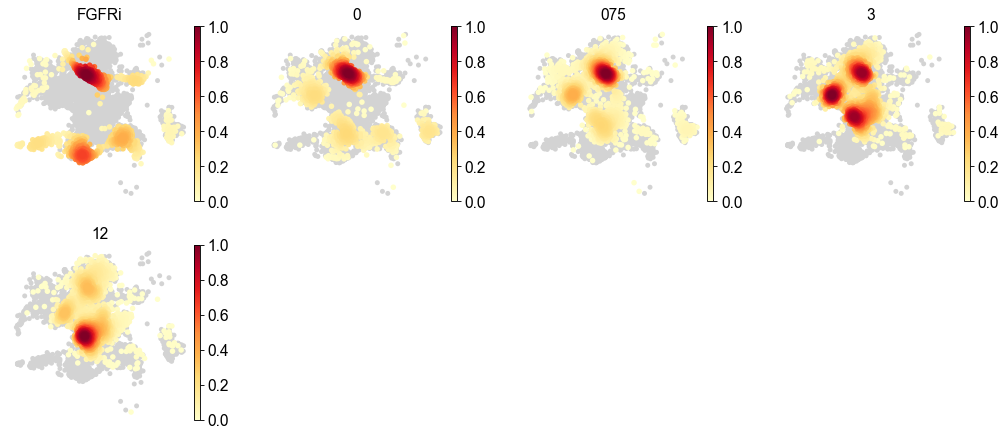

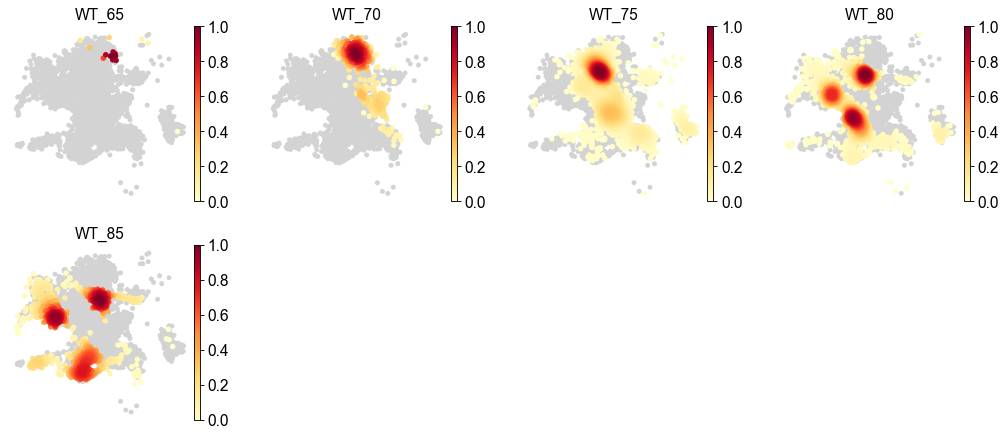

In [30]:
sc.tl.embedding_density(adata, groupby='batch')
sc.pl.embedding_density(adata, groupby='batch', fg_dotsize=100, save='meissner_density_batch.pdf')
sc.tl.embedding_density(adata, groupby='stage')
sc.pl.embedding_density(adata, groupby='stage', fg_dotsize=100, save='meissner_density_stage.pdf')

In [31]:
pd.crosstab(adata.obs.stage, adata.obs.batch)

batch,FGFRi,0,075,3,12
stage,,,,,
WT_65,0,2,6,2,8
WT_70,3,23,111,121,214
WT_75,591,694,1091,912,1146
WT_80,446,688,1223,987,964
WT_85,661,289,294,103,74


In [32]:
pd.crosstab(adata.obs.cluster, adata.obs.batch)

batch,FGFRi,0,075,3,12
cluster,,,,,
0,19,37,43,16,15
1,14,22,50,29,17
2,0,12,105,314,533
3,0,1,16,27,43
4,1,3,2,1,0
5,53,87,26,12,9
6,295,61,10,0,0
7,80,11,7,4,7
8,2,3,19,13,31


In [33]:
pd.crosstab(adata.obs.stage, adata.obs.clusters)

clusters,0,1,2,3,4,5,6,7
stage,,,,,,,,
WT_65,0,0,2,4,11,0,0,1
WT_70,8,41,12,207,194,1,3,6
WT_75,506,754,684,936,754,433,206,161
WT_80,1250,1215,1039,161,85,199,241,118
WT_85,479,66,132,111,12,258,363,0


In [34]:
pd.crosstab(adata.obs.cluster, adata.obs.clusters)

clusters,0,1,2,3,4,5,6,7
cluster,,,,,,,,
0,0,0,9,44,0,13,0,64
1,69,0,27,16,10,4,6,0
2,34,721,1,1,206,0,0,1
3,2,0,1,7,77,0,0,0
4,0,0,4,0,0,0,0,3
5,7,2,1,123,3,11,39,1
6,4,0,2,73,0,16,271,0
7,0,0,4,17,3,66,18,1
8,0,0,6,52,7,0,2,1


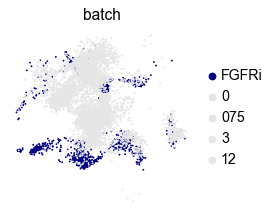

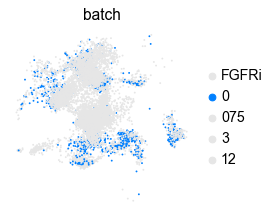

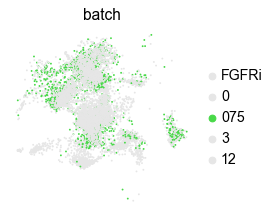

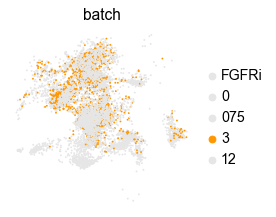

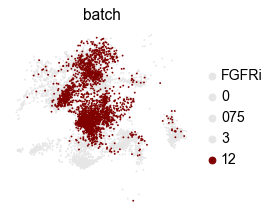

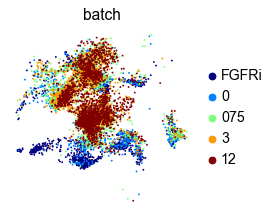

In [35]:
sc.pl.umap(adata, color=['batch'], palette=[[0,0,0.5], [0.9,0.9,0.9], [0.9,0.9,0.9],[0.9,0.9,0.9],[0.9,0.9,0.9]], wspace=0.5)
sc.pl.umap(adata, color=['batch'], palette=[[0.9,0.9,0.9], [0,0.5,1], [0.9,0.9,0.9],[0.9,0.9,0.9],[0.9,0.9,0.9]], wspace=0.5)
sc.pl.umap(adata, color=['batch'], palette=[[0.9,0.9,0.9], [0.9,0.9,0.9], [0.28387097,0.85,0.28387097],[0.9,0.9,0.9],[0.9,0.9,0.9]], wspace=0.5)
sc.pl.umap(adata, color=['batch'], palette=[[0.9,0.9,0.9], [0.9,0.9,0.9], [0.9,0.9,0.9],[1,0.59259259,0],[0.9,0.9,0.9]], wspace=0.5)
sc.pl.umap(adata, color=['batch'], palette=[[0.9,0.9,0.9], [0.9,0.9,0.9], [0.9,0.9,0.9],[0.9,0.9,0.9],[0.5,0,0]], wspace=0.5)

sc.pl.umap(adata, color=['batch'], palette=[[0,0,0.5], [0,0.5,1], [0.48387097,1,0.48387097],[1,0.59259259,0],[0.5,0,0]], wspace=0.5)

In [36]:
adata.obs['condition'] = adata.obs.batch
adata.obs.condition

AAACCCACATGAGGGT-1-FGFRi    FGFRi
AAACGAACAATAGTGA-1-FGFRi    FGFRi
AAACGCTCATTCACCC-1-FGFRi    FGFRi
AAACGCTGTCACGCTG-1-FGFRi    FGFRi
AAACGCTGTGTTCGTA-1-FGFRi    FGFRi
                            ...  
TTTGGAGGTGTTAAAG-1-12          12
TTTGGAGTCCTTATGT-1-12          12
TTTGTTGCAGAGTTGG-1-12          12
TTTGTTGTCCAACTAG-1-12          12
TTTGTTGTCCATCCGT-1-12          12
Name: condition, Length: 10653, dtype: category
Categories (5, object): [FGFRi, 0, 075, 3, 12]

In [37]:
adata.obs.stage.value_counts()

WT_75    4434
WT_80    4308
WT_85    1421
WT_70     472
WT_65      18
Name: stage, dtype: int64

In [38]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['ref', 'new'])

In [39]:
#adata_concat.write('adataconcat_ingestall.h5ad')

In [40]:
adata_concat.obs.cluster = adata_concat.obs.cluster.astype('category')
adata_concat.obs.cluster.cat.reorder_categories(adata_ref.obs.cluster.cat.categories, inplace=True)  

In [41]:
adata_concat.obs.stage = adata_concat.obs.stage.astype('category')
adata_concat.obs.stage.cat.reorder_categories(adata_ref.obs.stage.cat.categories, inplace=True) 

... storing 'orig.ident' as categorical
... storing 'embryo' as categorical
... storing 'BC' as categorical
... storing 'sex' as categorical
... storing 'clusters' as categorical
... storing 'condition' as categorical


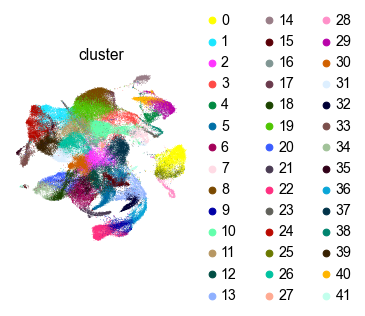

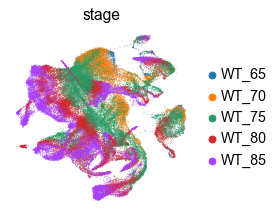

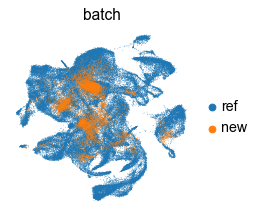

In [42]:
sc.pl.umap(adata_concat, color=['cluster'], save='meisser_all_cluster.pdf')
sc.pl.umap(adata_concat, color=['stage'], save='meisser_all_stage.pdf')
sc.pl.umap(adata_concat, color=['batch'], save='meissner_ingest.pdf')